### Basic ResNet implementation on Pets
* Load and visualize data
* Build multi layer CNN
* Build ResNet

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [2]:
bs = 64

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
tfms = get_transforms()

In [5]:
src = ImageList.from_folder(path).split_by_rand_pct(0.2, seed=2)

In [6]:
def get_data(size, bs, padding_mode='reflection'):
    return (src.label_from_re(r'([^/]+)_\d+.jpg$')
           .transform(tfms, size=size, padding_mode=padding_mode)
           .databunch(bs=bs).normalize(imagenet_stats))

In [7]:
data = get_data(224, bs)

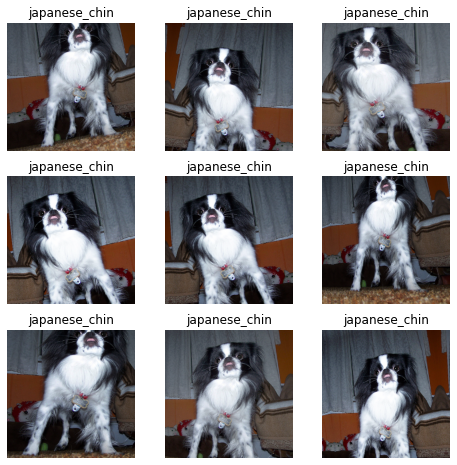

In [8]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

In [8]:
data.c

37

In [11]:
#learn.destroy()
gc.collect()

20

### Real ResNet from scratch

In [38]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0

In [12]:
learn = cnn_learner(data, models.resnet18, loss_func = nn.CrossEntropyLoss(), metrics=error_rate, pretrained=False)

In [13]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

In [14]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


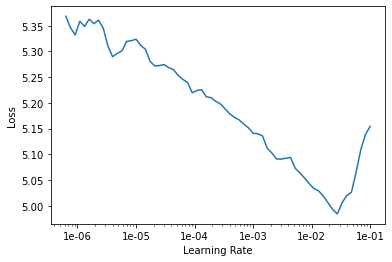

In [15]:
learn.recorder.plot(skip_end=15)

In [16]:
learn.fit_one_cycle(100, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,4.695961,3.618276,0.904601,00:13
1,4.410042,3.461518,0.911367,00:12
2,4.200214,3.334191,0.892422,00:13
3,4.037395,3.292435,0.876861,00:12
4,3.862795,3.236226,0.833559,00:13
5,3.699233,3.184813,0.855886,00:13
6,3.563328,3.720020,0.874831,00:13
7,3.483395,2.982633,0.813938,00:13
8,3.298368,3.903568,0.868742,00:13
9,3.193491,4.200349,0.852503,00:12


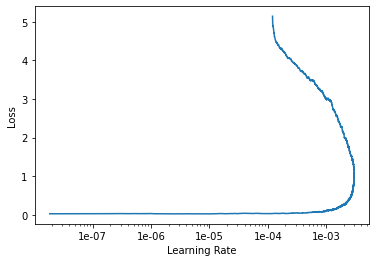

In [17]:
learn.recorder.plot()

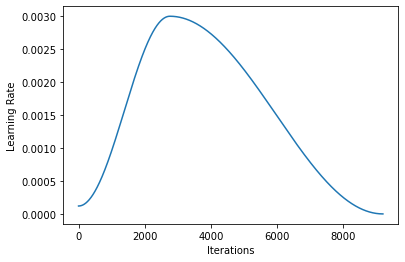

In [18]:
learn.recorder.plot_lr()

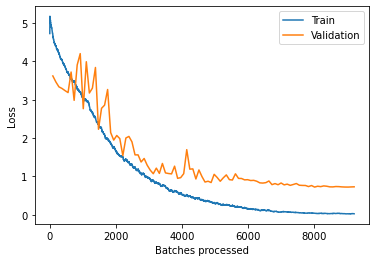

In [19]:
learn.recorder.plot_losses()

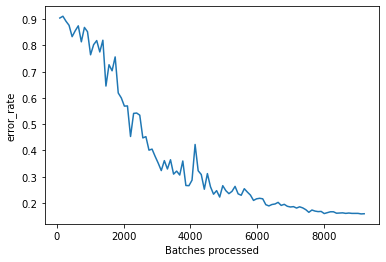

In [20]:
learn.recorder.plot_metrics()

In [21]:
learn.validate()

[0.72916275, tensor(0.1590)]

In [22]:
learn.validate(metrics=[error_rate])

[0.72916275, tensor(0.1590)]

### ResNet from scratch, onecycle start0.5

In [23]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0

In [24]:
learn = cnn_learner(data, models.resnet18, loss_func = nn.CrossEntropyLoss(), metrics=error_rate, pretrained=False)
learn.fit_one_cycle(100, 3e-3, pct_start=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,4.745743,3.746442,0.920162,00:13
1,4.357800,3.448426,0.900541,00:13
2,4.237408,3.344926,0.893775,00:13
3,4.046094,3.199044,0.837618,00:13
4,3.970533,3.236909,0.864005,00:13
5,3.805078,3.119151,0.837618,00:13
6,3.693354,3.072052,0.809878,00:13
7,3.550934,3.096169,0.829499,00:13
8,3.443709,2.931442,0.784844,00:13
9,3.333735,3.543125,0.828146,00:13


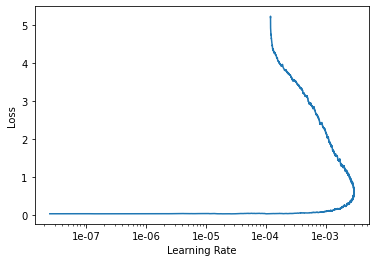

In [25]:
learn.recorder.plot()

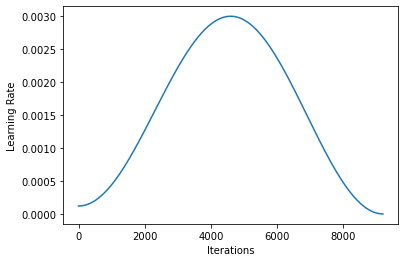

In [26]:
learn.recorder.plot_lr()

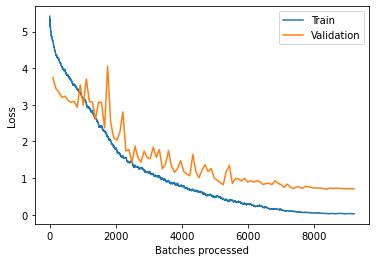

In [27]:
learn.recorder.plot_losses()

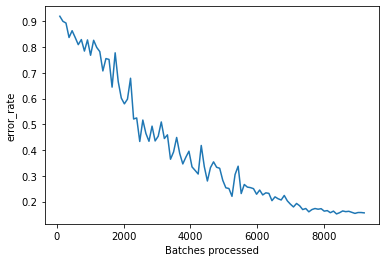

In [28]:
learn.recorder.plot_metrics()

In [29]:
learn.validate()

[0.70656544, tensor(0.1563)]

In [30]:
learn.validate(metrics=[error_rate])

[0.70656544, tensor(0.1563)]

### ResNet from scratch, onecycle start0.7

In [31]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0

In [32]:
learn = cnn_learner(data, models.resnet18, loss_func = nn.CrossEntropyLoss(), metrics=error_rate, pretrained=False)
learn.fit_one_cycle(100, 3e-3, pct_start=0.7)

epoch,train_loss,valid_loss,error_rate,time
0,4.648456,3.541293,0.918133,00:13
1,4.394151,3.409237,0.900541,00:13
2,4.179807,3.295043,0.875507,00:13
3,3.996680,3.236605,0.867388,00:13
4,3.864464,3.144578,0.843031,00:13
5,3.728382,3.139683,0.849797,00:13
6,3.629752,2.936666,0.789581,00:13
7,3.509543,2.824895,0.769959,00:13
8,3.397410,2.878137,0.785521,00:13
9,3.243466,2.743048,0.747632,00:13


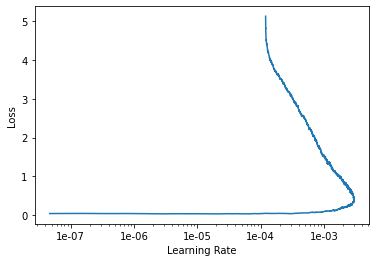

In [33]:
learn.recorder.plot()

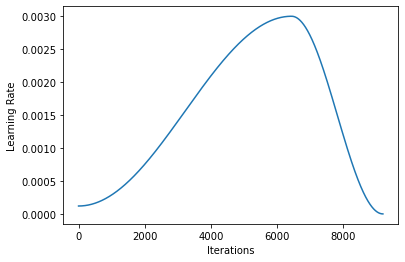

In [34]:
learn.recorder.plot_lr()

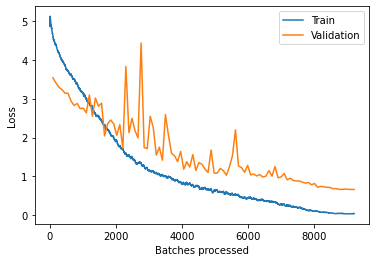

In [35]:
learn.recorder.plot_losses()

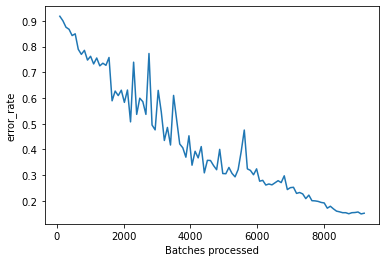

In [36]:
learn.recorder.plot_metrics()

In [37]:
learn.validate()

[0.6595482, tensor(0.1522)]

### ResNet from scratch, fit_fc()

In [38]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0

In [39]:
learn = cnn_learner(data, models.resnet18, loss_func = nn.CrossEntropyLoss(), metrics=error_rate, pretrained=False)

In [40]:
learn.fit_fc(100, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,4.374044,3.917237,0.933694,00:13
1,3.986422,3.418369,0.899865,00:13
2,3.826993,3.477388,0.903924,00:13
3,3.571846,3.863702,0.841678,00:13
4,3.397535,4.033503,0.821380,00:13
5,3.287235,3.156094,0.826116,00:13
6,3.201926,3.206047,0.840325,00:13
7,3.074490,3.014297,0.782815,00:13
8,2.946759,3.392741,0.768606,00:13
9,2.852196,3.275879,0.707713,00:13


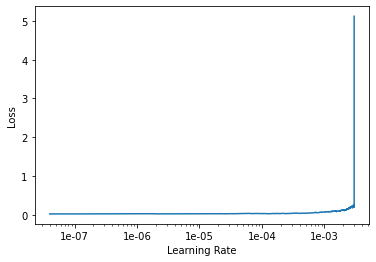

In [41]:
learn.recorder.plot()

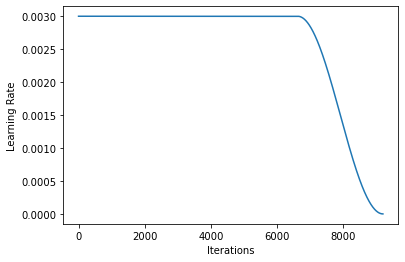

In [42]:
learn.recorder.plot_lr()

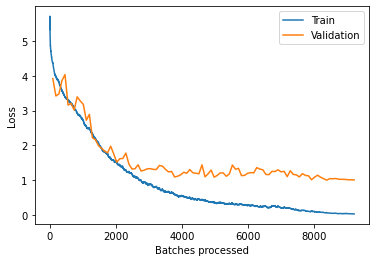

In [43]:
learn.recorder.plot_losses()

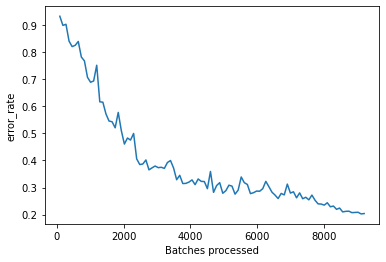

In [44]:
learn.recorder.plot_metrics()

In [45]:
learn.validate()

[1.0040585, tensor(0.2037)]

### ResNet from scratch, fit()

In [46]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0

In [47]:
learn = cnn_learner(data, models.resnet18, loss_func = nn.CrossEntropyLoss(), metrics=error_rate, pretrained=False)

In [48]:
learn.fit(100, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,4.240734,3.771359,0.924222,00:13
1,3.988846,4.570646,0.920839,00:13
2,3.792506,3.343386,0.870771,00:13
3,3.692492,5.464127,0.914750,00:13
4,3.587065,3.163869,0.864682,00:13
5,3.486261,3.346996,0.877537,00:13
6,3.450331,3.458693,0.869418,00:13
7,3.307946,3.081702,0.822733,00:13
8,3.155810,2.976432,0.832882,00:13
9,2.964457,3.002993,0.784168,00:13


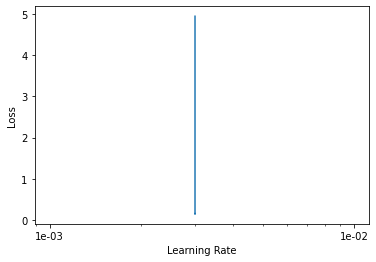

In [49]:
learn.recorder.plot()

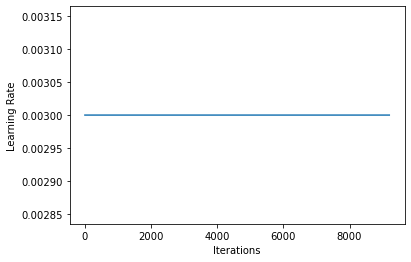

In [50]:
learn.recorder.plot_lr()

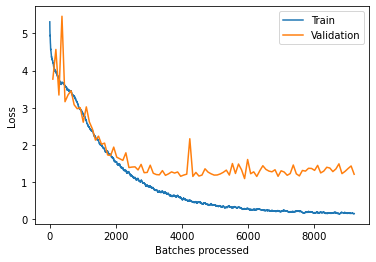

In [51]:
learn.recorder.plot_losses()

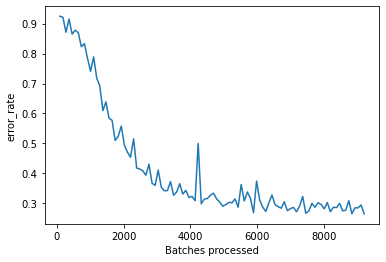

In [52]:
learn.recorder.plot_metrics()

In [53]:
learn.validate()

[1.211085, tensor(0.2652)]

### ResNet from scratch, fit_fc(0.5)

In [54]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0

In [55]:
learn = cnn_learner(data, models.resnet18, loss_func = nn.CrossEntropyLoss(), metrics=error_rate, pretrained=False)

In [56]:
learn.fit_fc(100, 3e-3, start_pct=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,4.333161,3.751747,0.948579,00:13
1,4.042221,3.579217,0.946549,00:13
2,3.835434,3.365164,0.882950,00:13
3,3.685211,3.623991,0.870771,00:13
4,3.613311,3.199302,0.860622,00:13
5,3.442775,5.158324,0.841001,00:13
6,3.294143,8.084015,0.893099,00:13
7,3.274837,3.136342,0.817321,00:13
8,3.158849,2.911110,0.803789,00:13
9,3.088176,2.900765,0.774019,00:13


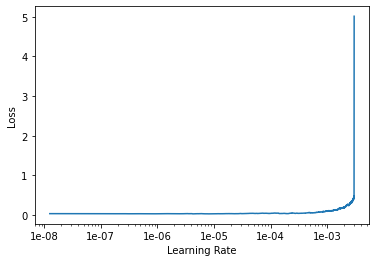

In [57]:
learn.recorder.plot()

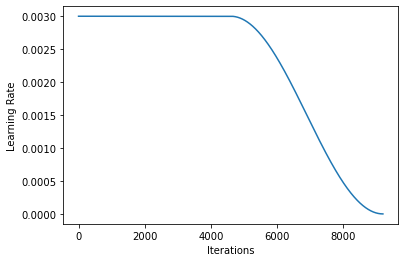

In [58]:
learn.recorder.plot_lr()

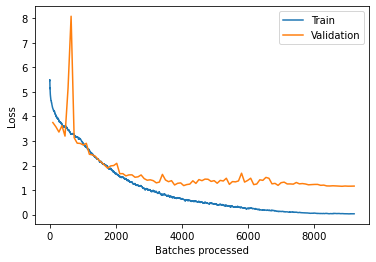

In [59]:
learn.recorder.plot_losses()

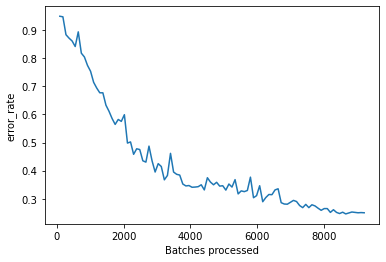

In [60]:
learn.recorder.plot_metrics()

### ResNet from scratch, fit_fc(0.35)

In [61]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0

In [87]:
learn = cnn_learner(data, models.resnet18, loss_func = nn.CrossEntropyLoss(), metrics=error_rate, pretrained=False)

In [63]:
learn.fit_fc(100, 3e-3, start_pct=0.35)

epoch,train_loss,valid_loss,error_rate,time
0,4.287889,3.713084,0.916103,00:13
1,3.957248,3.571609,0.936401,00:13
2,3.741580,3.824822,0.895129,00:13
3,3.668043,4.840533,0.876861,00:13
4,3.521299,3.368601,0.846414,00:13
5,3.441097,3.232160,0.843031,00:13
6,3.358743,3.379477,0.869418,00:13
7,3.280126,3.075350,0.797023,00:13
8,3.172462,4.294839,0.797700,00:13
9,3.130321,3.222406,0.826116,00:13


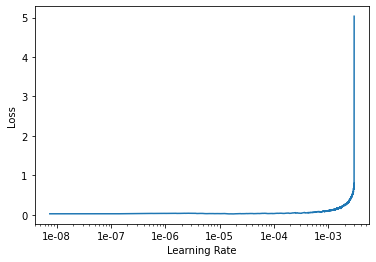

In [64]:
learn.recorder.plot()

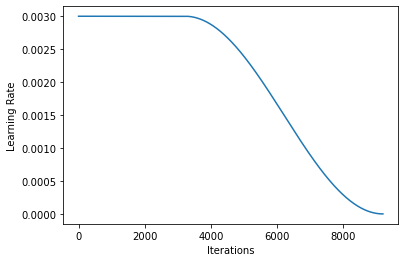

In [65]:
learn.recorder.plot_lr()

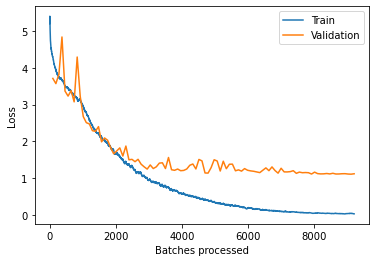

In [66]:
learn.recorder.plot_losses()

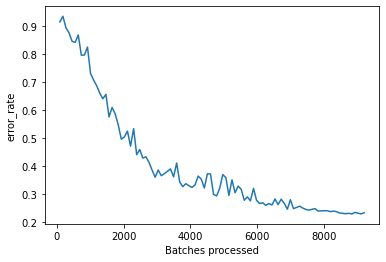

In [67]:
learn.recorder.plot_metrics()

In [68]:
learn.validate()

[1.1184599, tensor(0.2334)]

In [69]:
learn.validate(metrics=[error_rate])

[1.1184599, tensor(0.2334)]

In [70]:
learn.save("origresnet18-nopretrain-100-fitfc035")

In [80]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


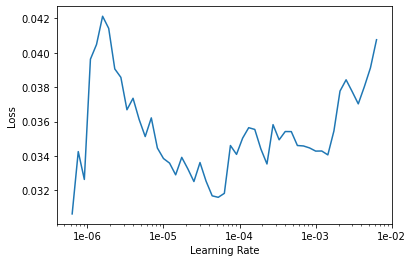

In [81]:
learn.lr_find()
learn.recorder.plot()

### Jumping out from a bad local optimum

##### basic schedule, 1e-6

In [88]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [89]:
learn.fit_one_cycle(5, 1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.039610,1.111696,0.230717,00:12
1,0.042370,1.120925,0.236806,00:12
2,0.036515,1.096885,0.232070,00:12
3,0.030363,1.103049,0.230041,00:12
4,0.033134,1.108050,0.230717,00:12


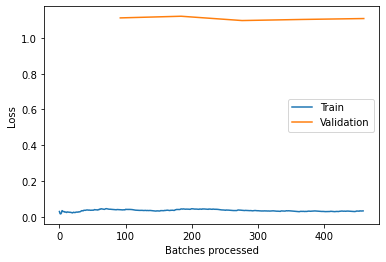

In [90]:
learn.recorder.plot_losses()

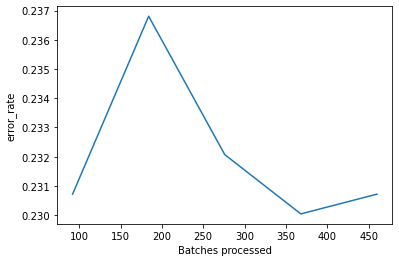

In [91]:
learn.recorder.plot_metrics()

##### basic schedule, 3e-6

In [92]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [93]:
learn.fit_one_cycle(5, 3e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.037367,1.110002,0.229364,00:12
1,0.031630,1.114818,0.230717,00:12
2,0.026373,1.116170,0.232747,00:12
3,0.034831,1.113863,0.230041,00:12
4,0.032172,1.109019,0.234100,00:12


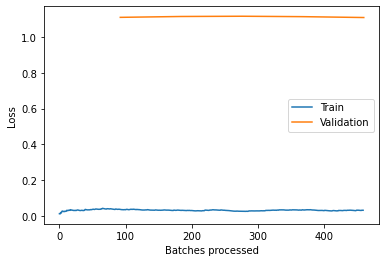

In [94]:
learn.recorder.plot_losses()

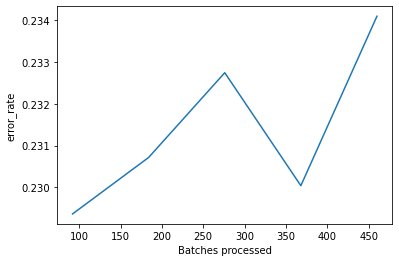

In [95]:
learn.recorder.plot_metrics()

##### basic schedule, 6e-6

In [96]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [97]:
learn.fit_one_cycle(5, 6e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.036171,1.118275,0.225981,00:12
1,0.034183,1.112212,0.232070,00:13
2,0.034639,1.117052,0.230717,00:12
3,0.030291,1.110911,0.232070,00:12
4,0.030933,1.120485,0.230041,00:12


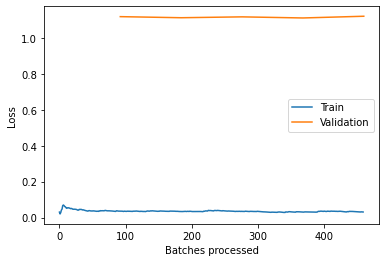

In [98]:
learn.recorder.plot_losses()

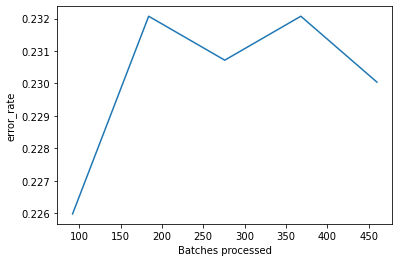

In [99]:
learn.recorder.plot_metrics()

##### basic schedule, 1e-5

In [100]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [101]:
learn.fit_one_cycle(5, 1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.038199,1.106782,0.230717,00:12
1,0.035985,1.107488,0.226658,00:12
2,0.031064,1.107094,0.230041,00:13
3,0.036414,1.109936,0.231394,00:13
4,0.035569,1.116344,0.229364,00:12


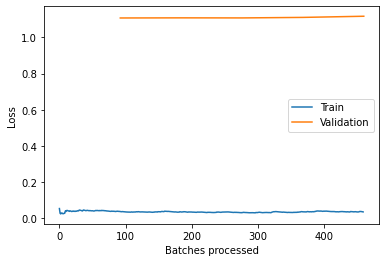

In [102]:
learn.recorder.plot_losses()

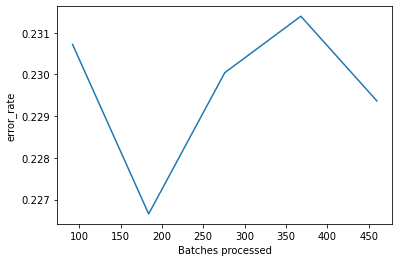

In [103]:
learn.recorder.plot_metrics()

##### basic schedule, 3e-5

In [104]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [105]:
learn.fit_one_cycle(5, 3e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.041887,1.115099,0.229364,00:12
1,0.034465,1.108010,0.228687,00:12
2,0.031799,1.115025,0.234777,00:12
3,0.028277,1.107426,0.230041,00:12
4,0.034146,1.111090,0.230717,00:13


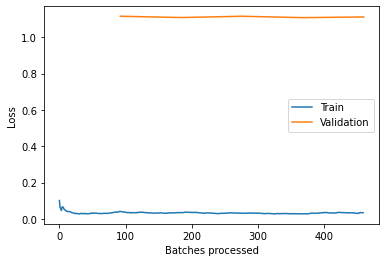

In [106]:
learn.recorder.plot_losses()

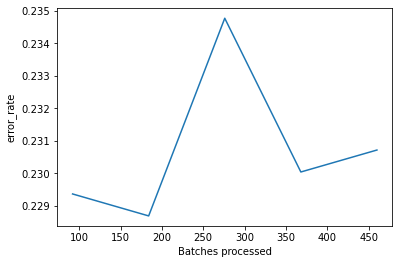

In [107]:
learn.recorder.plot_metrics()

##### mid peak schedule, 1e-6

In [108]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [109]:
learn.fit_one_cycle(5, 1e-6, pct_start=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,0.035351,1.122101,0.230717,00:13
1,0.036994,1.113465,0.227334,00:13
2,0.031747,1.109293,0.226658,00:12
3,0.034970,1.108080,0.229364,00:12
4,0.033881,1.102774,0.229364,00:12


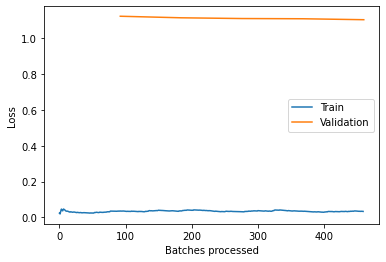

In [110]:
learn.recorder.plot_losses()

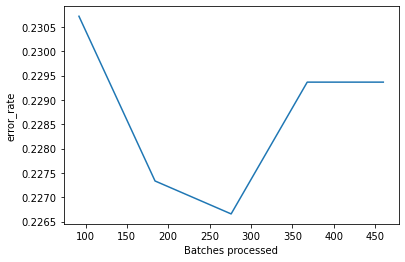

In [111]:
learn.recorder.plot_metrics()

##### mid peak schedule, 3e-6

In [112]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [113]:
learn.fit_one_cycle(5, 3e-6, pct_start=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,0.030900,1.104841,0.231394,00:13
1,0.040461,1.109784,0.228011,00:12
2,0.038811,1.112706,0.229364,00:12
3,0.035045,1.108082,0.230041,00:12
4,0.037252,1.121709,0.234777,00:12


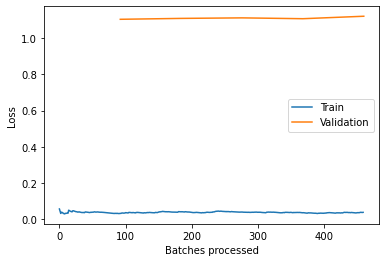

In [114]:
learn.recorder.plot_losses()

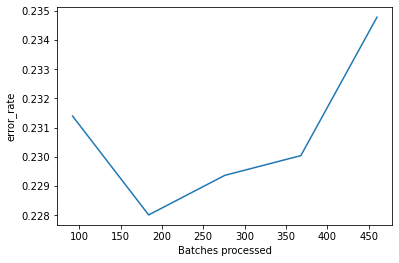

In [115]:
learn.recorder.plot_metrics()

##### mid peak schedule, 6e-6

In [116]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [117]:
learn.fit_one_cycle(5, 6e-6, pct_start=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,0.035990,1.115041,0.228687,00:12
1,0.030293,1.105906,0.228687,00:12
2,0.033005,1.110105,0.232070,00:12
3,0.040304,1.106582,0.228687,00:13
4,0.034593,1.115146,0.230717,00:12


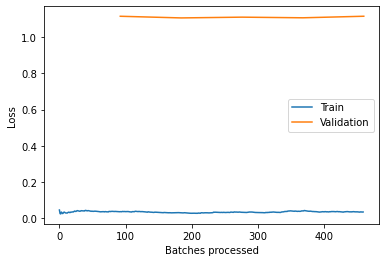

In [118]:
learn.recorder.plot_losses()

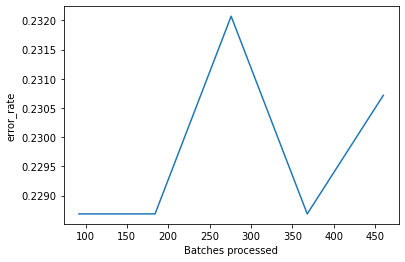

In [119]:
learn.recorder.plot_metrics()

##### mid peak schedule, 1e-5

In [120]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [121]:
learn.fit_one_cycle(5, 1e-5, pct_start=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,0.032051,1.115857,0.226658,00:13
1,0.034904,1.110029,0.232070,00:12
2,0.031169,1.115165,0.231394,00:13
3,0.033543,1.108534,0.228687,00:12
4,0.032085,1.113868,0.228687,00:12


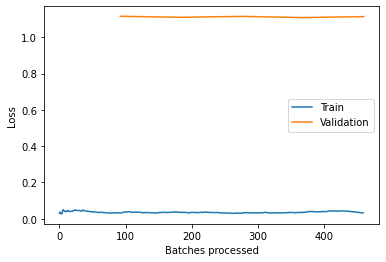

In [122]:
learn.recorder.plot_losses()

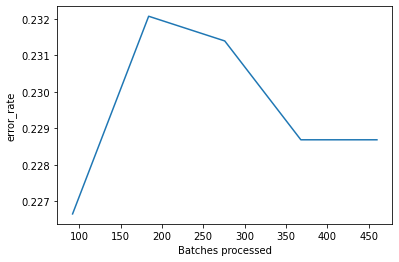

In [123]:
learn.recorder.plot_metrics()

##### mid peak schedule, 3e-5

In [124]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [125]:
learn.fit_one_cycle(5, 3e-5, pct_start=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,0.033884,1.116374,0.233424,00:12
1,0.034347,1.105053,0.230041,00:12
2,0.033554,1.107930,0.230717,00:13
3,0.039688,1.108418,0.228687,00:12
4,0.035200,1.113440,0.228011,00:12


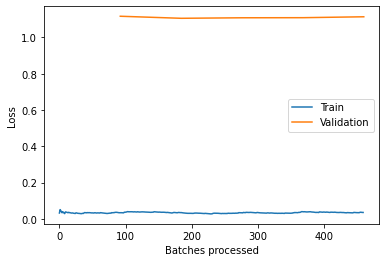

In [126]:
learn.recorder.plot_losses()

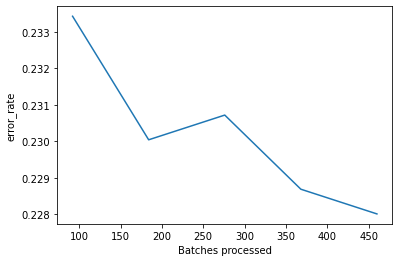

In [127]:
learn.recorder.plot_metrics()

##### basic schedule, 6e-5

In [128]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [129]:
learn.fit_one_cycle(5, 6e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.031211,1.108938,0.232747,00:12
1,0.035109,1.124399,0.234777,00:12
2,0.040135,1.118239,0.228687,00:12
3,0.039492,1.129479,0.230717,00:13
4,0.033497,1.124895,0.234100,00:12


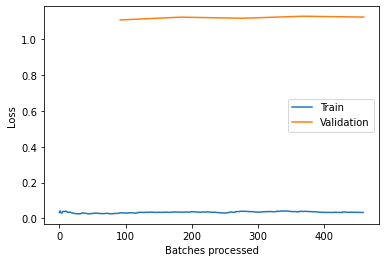

In [130]:
learn.recorder.plot_losses()

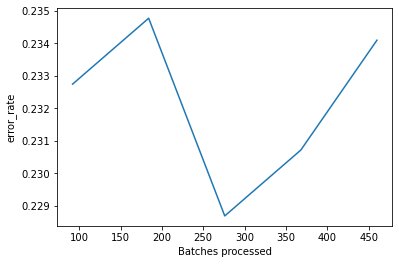

In [131]:
learn.recorder.plot_metrics()

##### basic schedule, 1e-4

In [132]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [133]:
learn.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.037085,1.098979,0.231394,00:12
1,0.037019,1.120706,0.235453,00:12
2,0.039391,1.118410,0.236130,00:12
3,0.031793,1.101489,0.234100,00:12
4,0.035511,1.109886,0.229364,00:12


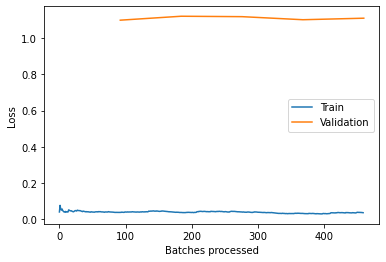

In [134]:
learn.recorder.plot_losses()

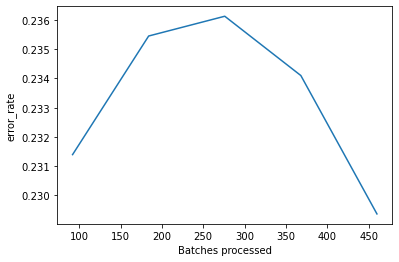

In [135]:
learn.recorder.plot_metrics()

##### basic schedule, 3e-4

In [136]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [137]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.039408,1.119750,0.234100,00:12
1,0.034084,1.155524,0.236130,00:13
2,0.040765,1.137715,0.233424,00:13
3,0.039421,1.130057,0.228011,00:12
4,0.038045,1.142230,0.230041,00:13


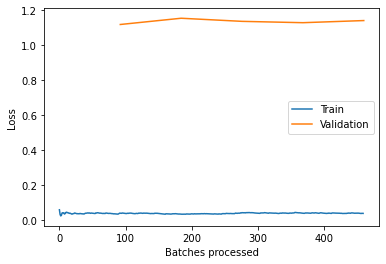

In [138]:
learn.recorder.plot_losses()

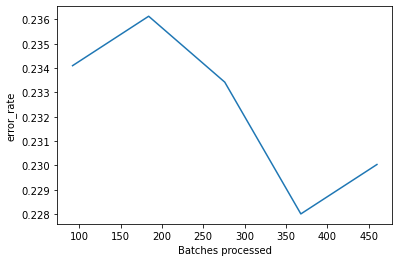

In [139]:
learn.recorder.plot_metrics()

##### basic schedule, 6e-4

In [140]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [141]:
learn.fit_one_cycle(5, 6e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.036600,1.145463,0.235453,00:13
1,0.040482,1.180360,0.238160,00:13
2,0.046072,1.186310,0.240866,00:12
3,0.046907,1.152833,0.229364,00:12
4,0.038089,1.154744,0.229364,00:12


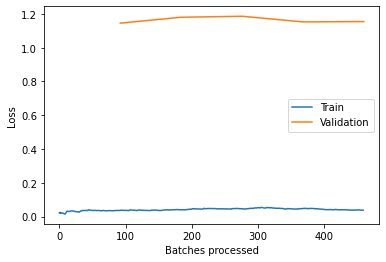

In [142]:
learn.recorder.plot_losses()

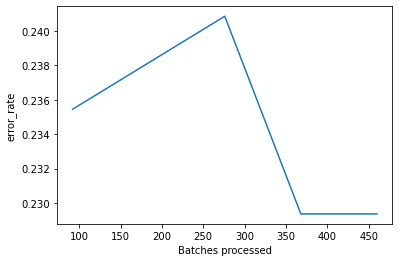

In [143]:
learn.recorder.plot_metrics()

##### basic schedule, 1e-3

In [144]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [145]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.033768,1.170228,0.242219,00:12
1,0.060595,1.287141,0.268606,00:13
2,0.058689,1.217012,0.247632,00:13
3,0.059061,1.193462,0.247632,00:13
4,0.052301,1.172791,0.247632,00:13


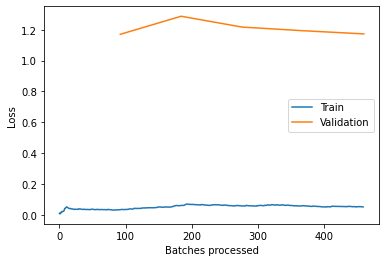

In [146]:
learn.recorder.plot_losses()

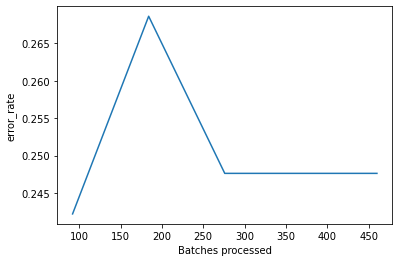

In [147]:
learn.recorder.plot_metrics()

##### basic schedule, 3e-3

In [148]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [149]:
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.064273,1.520405,0.291610,00:12
1,0.353548,1.522550,0.324087,00:12
2,0.269214,1.273131,0.278755,00:13
3,0.164946,1.185724,0.265900,00:12
4,0.112905,1.140885,0.252368,00:12


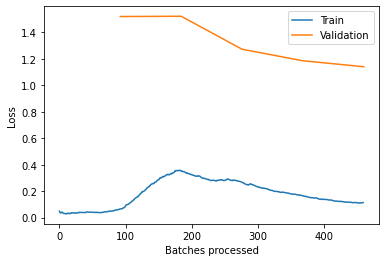

In [150]:
learn.recorder.plot_losses()

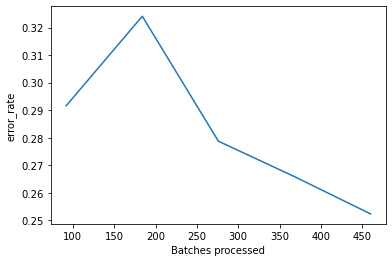

In [151]:
learn.recorder.plot_metrics()

##### basic schedule, 6e-3

In [152]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [153]:
learn.fit_one_cycle(5, 6e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.219587,2.862402,0.465494,00:12
1,0.834288,1.414668,0.387009,00:12
2,0.540309,1.322666,0.356563,00:12
3,0.319067,1.061112,0.283491,00:13
4,0.211079,0.966082,0.249662,00:12


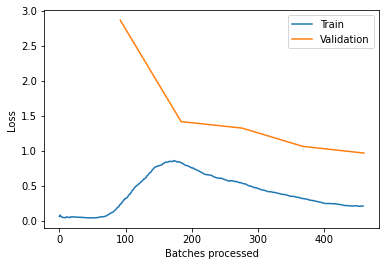

In [154]:
learn.recorder.plot_losses()

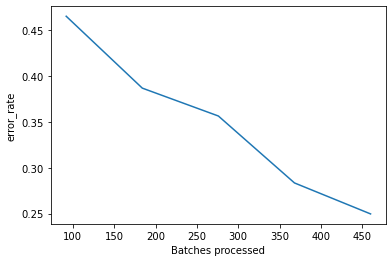

In [155]:
learn.recorder.plot_metrics()

##### basic schedule, 1e-2

In [156]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [157]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.038382,1.109001,0.227334,00:12
1,0.030464,1.119043,0.229364,00:13
2,0.038492,1.107368,0.230717,00:12
3,0.032879,1.102948,0.233424,00:12
4,0.040120,1.109277,0.228011,00:12


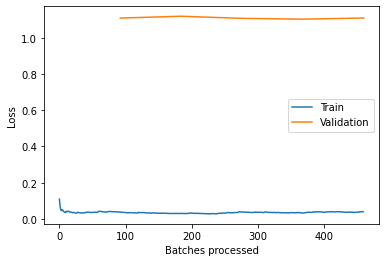

In [158]:
learn.recorder.plot_losses()

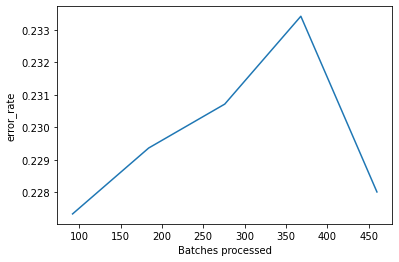

In [159]:
learn.recorder.plot_metrics()

##### basic schedule, 6e-5, 10e

In [160]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [161]:
learn.fit_one_cycle(10, 6e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.033799,1.116965,0.228687,00:12
1,0.033012,1.114046,0.232070,00:12
2,0.032654,1.110368,0.229364,00:13
3,0.034065,1.101793,0.230041,00:12
4,0.030079,1.116943,0.230717,00:12
5,0.035312,1.101475,0.230717,00:12
6,0.028781,1.124527,0.231394,00:13
7,0.036797,1.121674,0.233424,00:13
8,0.032404,1.109835,0.232747,00:13
9,0.032766,1.102919,0.233424,00:12


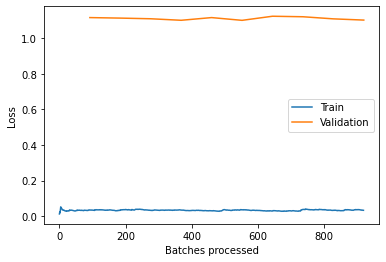

In [162]:
learn.recorder.plot_losses()

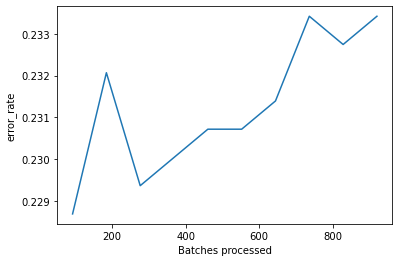

In [163]:
learn.recorder.plot_metrics()

##### basic schedule, 1e-4, 10e

In [164]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [165]:
learn.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.038298,1.113750,0.231394,00:12
1,0.028953,1.115301,0.233424,00:13
2,0.032245,1.105903,0.234100,00:12
3,0.037093,1.119457,0.229364,00:13
4,0.041639,1.111742,0.228687,00:12
5,0.036192,1.103061,0.231394,00:12
6,0.035327,1.101129,0.235453,00:12
7,0.028907,1.111198,0.230717,00:12
8,0.027880,1.113138,0.232070,00:12
9,0.026212,1.119732,0.234100,00:12


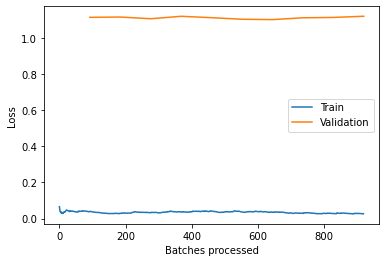

In [166]:
learn.recorder.plot_losses()

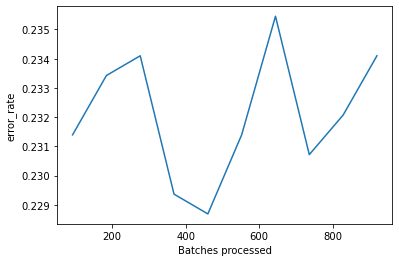

In [167]:
learn.recorder.plot_metrics()

##### basic schedule, 3e-4, 10e

In [168]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [169]:
learn.fit_one_cycle(10, 3e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.038379,1.109946,0.229364,00:12
1,0.030868,1.132515,0.232747,00:12
2,0.036870,1.125306,0.230717,00:12
3,0.033755,1.156435,0.250338,00:12
4,0.033319,1.150320,0.238836,00:13
5,0.035719,1.146308,0.238836,00:12
6,0.035465,1.143416,0.238160,00:13
7,0.033590,1.125599,0.232070,00:12
8,0.035884,1.122515,0.233424,00:12
9,0.029339,1.132351,0.230717,00:13


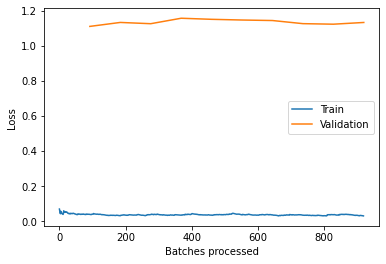

In [170]:
learn.recorder.plot_losses()

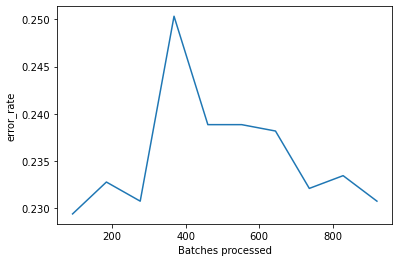

In [171]:
learn.recorder.plot_metrics()

##### basic schedule, 6e-4, 10e

In [172]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [173]:
learn.fit_one_cycle(10, 6e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.032722,1.121524,0.230717,00:12
1,0.037007,1.140944,0.234100,00:12
2,0.051633,1.180200,0.244926,00:12
3,0.046373,1.193696,0.242896,00:12
4,0.041327,1.163754,0.233424,00:12
5,0.050313,1.182715,0.239513,00:12
6,0.040051,1.185838,0.238160,00:12
7,0.036849,1.167667,0.243572,00:12
8,0.030093,1.158181,0.236806,00:12
9,0.035084,1.168492,0.232747,00:12


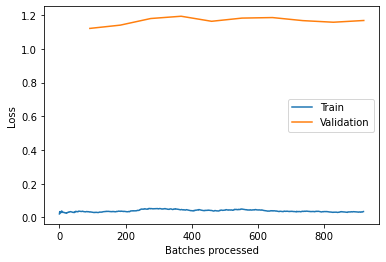

In [174]:
learn.recorder.plot_losses()

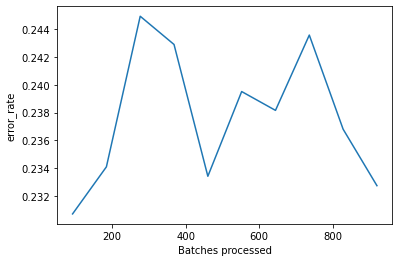

In [175]:
learn.recorder.plot_metrics()

##### basic schedule, 1e-3, 10e

In [176]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [177]:
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.037762,1.121551,0.230717,00:12
1,0.040413,1.214491,0.251015,00:13
2,0.071535,1.256512,0.259134,00:13
3,0.084151,1.252617,0.258457,00:12
4,0.069765,1.239081,0.259811,00:12
5,0.062821,1.215793,0.251015,00:13
6,0.054612,1.253036,0.243572,00:13
7,0.048015,1.201816,0.241543,00:13
8,0.046234,1.185673,0.232747,00:12
9,0.040050,1.192727,0.237483,00:12


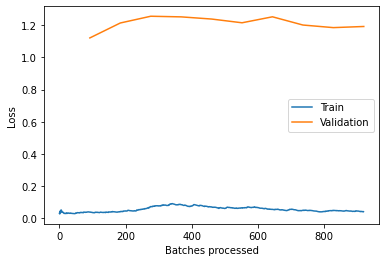

In [178]:
learn.recorder.plot_losses()

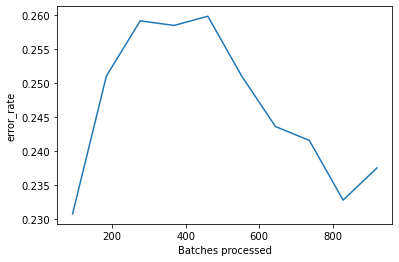

In [179]:
learn.recorder.plot_metrics()

##### basic schedule, 3e-3, 10e

In [180]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [181]:
learn.fit_one_cycle(10, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.038201,1.235644,0.247632,00:12
1,0.111717,1.818072,0.353857,00:12
2,0.278775,1.512888,0.337618,00:12
3,0.284134,1.494575,0.318674,00:13
4,0.238977,1.357916,0.288227,00:12
5,0.176865,1.271664,0.277402,00:13
6,0.140528,1.169605,0.253721,00:13
7,0.096983,1.157129,0.253721,00:12
8,0.075427,1.115240,0.242219,00:12
9,0.070891,1.100506,0.238836,00:12


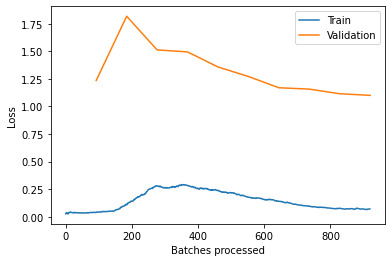

In [182]:
learn.recorder.plot_losses()

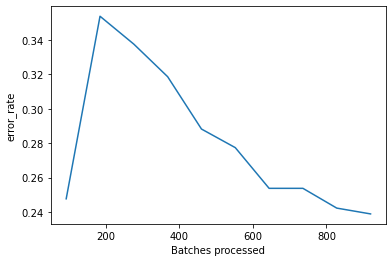

In [183]:
learn.recorder.plot_metrics()

##### basic schedule, 6e-3, 10e

In [184]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [185]:
learn.fit_one_cycle(10, 6e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.043087,1.359322,0.277402,00:12
1,0.409642,2.267629,0.446549,00:12
2,0.625246,1.641979,0.418133,00:12
3,0.598631,1.585959,0.397158,00:13
4,0.538630,1.333799,0.338972,00:13
5,0.388530,1.180361,0.295670,00:13
6,0.280866,1.111422,0.282815,00:13
7,0.189509,1.034968,0.248985,00:13
8,0.137043,1.005599,0.242896,00:12
9,0.109177,0.994989,0.235453,00:13


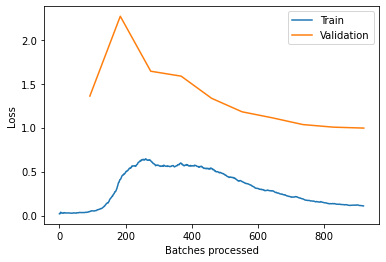

In [186]:
learn.recorder.plot_losses()

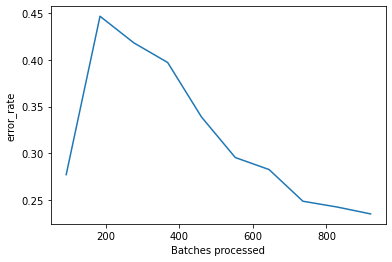

In [187]:
learn.recorder.plot_metrics()

##### basic schedule, 1e-2, 10e

In [188]:
_ = learn.load("origresnet18-nopretrain-100-fitfc035")

In [189]:
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.031295,1.114039,0.229364,00:12
1,0.030817,1.114564,0.233424,00:12
2,0.033638,1.123245,0.234777,00:12
3,0.035058,1.123952,0.234777,00:12
4,0.034539,1.130706,0.232747,00:12
5,0.031445,1.124733,0.230041,00:12
6,0.034829,1.116482,0.225981,00:12
7,0.027756,1.119452,0.229364,00:12
8,0.030852,1.120684,0.229364,00:12
9,0.034989,1.117813,0.228687,00:12


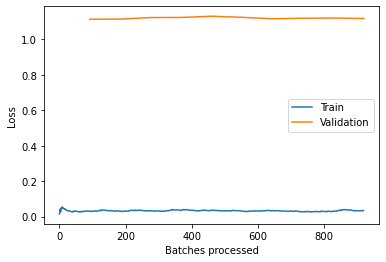

In [190]:
learn.recorder.plot_losses()

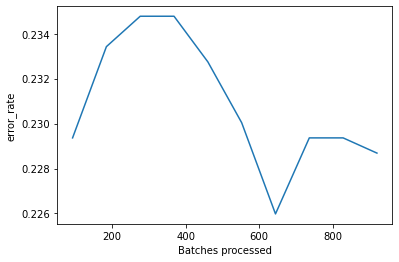

In [191]:
learn.recorder.plot_metrics()

In [192]:
learn.destroy()

this Learner object self-destroyed - it still exists, but no longer usable


In [193]:
gc.collect()

20